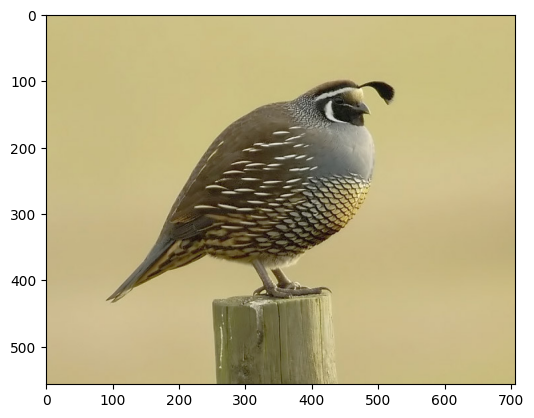

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

image_url = "https://upload.wikimedia.org/wikipedia/commons/a/aa/California_quail.jpg"
image_url = "California_quail.jpg"
# image_path = keras.utils.get_file(origin=image_url)
# image = keras.utils.load_img(image_path)
image = plt.imread(image_url)

plt.imshow(image)

In [3]:
!wget https://upload.wikimedia.org/wikipedia/commons/a/aa/California_quail.jpg

--2025-10-24 13:15:06--  https://upload.wikimedia.org/wikipedia/commons/a/aa/California_quail.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67120 (66K) [image/jpeg]
Saving to: ‘California_quail.jpg’

California_quail.jp 100%[===================>]  65.55K  --.-KB/s    in 0.04s   

2025-10-24 13:15:06 (1.80 MB/s) - ‘California_quail.jpg’ saved [67120/67120]



In [2]:
import keras_hub

image_classifier = keras_hub.models.ImageClassifier.from_preset(
    "resnet_50_imagenet",
    activation="softmax",
)
batch = np.array([image])
image_classifier.preprocessor.image_size = (224, 224)
preds = image_classifier.predict(batch)
preds.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


(1, 1000)

In [3]:
keras_hub.utils.decode_imagenet_predictions(preds)

[[('quail', 0.9996540546417236),
  ('prairie_chicken', 8.488614548696205e-05),
  ('partridge', 1.402714042342268e-05),
  ('black_grouse', 7.453964826709125e-06),
  ('bullet_train', 7.2769485086610075e-06)]]

In [4]:
!wget https://upload.wikimedia.org/wikipedia/commons/6/62/Panthera_tigris_sumatran_subspecies.jpg

--2025-10-24 13:20:54--  https://upload.wikimedia.org/wikipedia/commons/6/62/Panthera_tigris_sumatran_subspecies.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446822 (436K) [image/jpeg]
Saving to: ‘Panthera_tigris_sumatran_subspecies.jpg’

Panthera_tigris_sum 100%[===================>] 436.35K  --.-KB/s    in 0.09s   

2025-10-24 13:20:54 (4.81 MB/s) - ‘Panthera_tigris_sumatran_subspecies.jpg’ saved [446822/446822]



In [9]:
pantera_url = "https://upload.wikimedia.org/wikipedia/commons/6/62/Panthera_tigris_sumatran_subspecies.jpg"

In [5]:
pantera_path = 'Panthera_tigris_sumatran_subspecies.jpg'

In [6]:
batch = np.array([plt.imread(pantera_path)])
image_classifier.preprocessor.image_size = (224, 224)
preds = image_classifier.predict(batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


In [7]:
keras_hub.utils.decode_imagenet_predictions(preds)

[[('tiger', 0.946363627910614),
  ('tiger_cat', 0.04504330828785896),
  ('lynx', 0.0012894900282844901),
  ('jaguar', 0.0006716539501212537),
  ('leopard', 0.00021438767726067454)]]

In [8]:
image_classifier.save("image_classifier.keras")

##

In [10]:
new_model = keras.models.load_model("image_classifier.keras")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/serialization_lib.py:734: UserWarning: `compile()` was not called as part of model loading because the model's `compile()` method is custom. All subclassed Models that have `compile()` overridden should also override `get_compile_config()` and `compile_from_config(config)`. Alternatively, you can call `compile()` manually after loading.
  instance.compile_from_config(compile_config)


In [12]:
keras_hub.utils.decode_imagenet_predictions(new_model.predict(batch))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


[[('tiger', 0.946363627910614),
  ('tiger_cat', 0.04504330828785896),
  ('lynx', 0.0012894900282844901),
  ('jaguar', 0.0006716539501212537),
  ('leopard', 0.00021438767726067454)]]